# step-1: data overview. 

### Import all libraries 

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

### Load Dataset

In [16]:
df = pd.read_csv("tech_startup_hiring_dataset_extended.csv")


####  Dataset Shape

In [19]:
print("Dataset Shape (rows, columns):", df.shape)


Dataset Shape (rows, columns): (100000, 28)


#### Columns in the Dataset

In [22]:
print("Column Names:")
print(df.columns.tolist())


Column Names:
['Candidate_ID', 'Job_ID', 'Candidate_Skills', 'Job_Skills_Required', 'Skill_Match_Score', 'Years_Experience', 'Education_Level', 'Sector', 'Job_Role', 'Location', 'Funding_Amount', 'Headcount', 'Hiring_Year', 'Time_to_Hire', 'Hire_Success', 'Turnover_Risk', 'Candidate_Sentiment', 'Job_Demand_Score', 'Skill_Gap', 'Expected_Salary', 'Offered_Salary', 'Interview_Rounds', 'Offer_Accepted', 'Referral', 'Remote_Work_Option', 'Candidate_Age', 'Previous_Companies', 'Certification_Count']


#### Data Types of Each Column

In [25]:
print("\nData Types:")
print(df.dtypes)



Data Types:
Candidate_ID            object
Job_ID                  object
Candidate_Skills        object
Job_Skills_Required     object
Skill_Match_Score      float64
Years_Experience         int64
Education_Level         object
Sector                  object
Job_Role                object
Location                object
Funding_Amount         float64
Headcount                int64
Hiring_Year             object
Time_to_Hire             int64
Hire_Success             int64
Turnover_Risk          float64
Candidate_Sentiment    float64
Job_Demand_Score       float64
Skill_Gap                int64
Expected_Salary          int64
Offered_Salary           int64
Interview_Rounds         int64
Offer_Accepted           int64
Referral                 int64
Remote_Work_Option      object
Candidate_Age            int64
Previous_Companies       int64
Certification_Count      int64
dtype: object


#### Missing Values

In [28]:
print("\nMissing Values per Column:")
print(df.isnull().sum())



Missing Values per Column:
Candidate_ID           0
Job_ID                 0
Candidate_Skills       0
Job_Skills_Required    0
Skill_Match_Score      0
Years_Experience       0
Education_Level        0
Sector                 0
Job_Role               0
Location               0
Funding_Amount         0
Headcount              0
Hiring_Year            0
Time_to_Hire           0
Hire_Success           0
Turnover_Risk          0
Candidate_Sentiment    0
Job_Demand_Score       0
Skill_Gap              0
Expected_Salary        0
Offered_Salary         0
Interview_Rounds       0
Offer_Accepted         0
Referral               0
Remote_Work_Option     0
Candidate_Age          0
Previous_Companies     0
Certification_Count    0
dtype: int64


#### Basic Statistics of Numerical Columns

In [31]:
print("\nSummary Statistics (Numerical Columns):")
print(df.describe())



Summary Statistics (Numerical Columns):
       Skill_Match_Score  Years_Experience  Funding_Amount      Headcount  \
count      100000.000000     100000.000000    1.000000e+05  100000.000000   
mean            0.317963         10.004980    4.999281e+07   50059.817210   
std             0.250973          6.051919    2.882889e+07   28783.302665   
min             0.000000          0.000000    1.003336e+05     100.000000   
25%             0.000000          5.000000    2.493596e+07   25268.750000   
50%             0.330000         10.000000    5.008962e+07   50000.500000   
75%             0.500000         15.000000    7.497808e+07   75008.500000   
max             1.000000         20.000000    9.999963e+07   99998.000000   

        Time_to_Hire  Hire_Success  Turnover_Risk  Candidate_Sentiment  \
count  100000.000000  100000.00000  100000.000000        100000.000000   
mean       47.548950       0.13976       0.579053             0.499921   
std        24.865362       0.34674       0.

#### Overview of Categorical Columns

In [34]:
print("\nUnique Values in Categorical Columns:")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")



Unique Values in Categorical Columns:
Candidate_ID: 100000 unique values
Job_ID: 100000 unique values
Candidate_Skills: 28739 unique values
Job_Skills_Required: 28751 unique values
Education_Level: 3 unique values
Sector: 8 unique values
Job_Role: 5 unique values
Location: 7 unique values
Hiring_Year: 6 unique values
Remote_Work_Option: 3 unique values


#### Overview of columns with discription 

In [39]:
print(df.columns)

Index(['Candidate_ID', 'Job_ID', 'Candidate_Skills', 'Job_Skills_Required',
       'Skill_Match_Score', 'Years_Experience', 'Education_Level', 'Sector',
       'Job_Role', 'Location', 'Funding_Amount', 'Headcount', 'Hiring_Year',
       'Time_to_Hire', 'Hire_Success', 'Turnover_Risk', 'Candidate_Sentiment',
       'Job_Demand_Score', 'Skill_Gap', 'Expected_Salary', 'Offered_Salary',
       'Interview_Rounds', 'Offer_Accepted', 'Referral', 'Remote_Work_Option',
       'Candidate_Age', 'Previous_Companies', 'Certification_Count'],
      dtype='object')


**interpretation**
 - 'Candidate_ID' : Unique identifier for each candidate, 
 - 'Job_ID' : nique identifier for each job, 
 - 'Candidate_Skills' : List of skills the candidate has, 
 - 'Job_Skills_Required' : List of skills required for the job,
 - 'Skill_Match_Score' : Score (0–1) showing skill alignment, 
 - 'Years_Experience' : Candidate’s work experience in years, 
 - 'Education_Level' : Highest education level (Bachelor’s, etc.), 
 - 'Sector' : Industry sector (e.g., fintech, edtech),
 - 'Job_Role' : Job title or role type, 
 - 'Location' : Job/candidate location (e.g., Bangalore), 
 - 'Funding_Amount' : Startup funding (in INR or USD), 
 - 'Headcount' : Number of employees in the company, 
 - 'Hiring_Year' : Fiscal year of hiring (e.g., FY25),
 - 'Time_to_Hire' : Days taken to fill the job, 
 - 'Hire_Success' : 1 = Hired, 0 = Not hired, 
 - 'Turnover_Risk' : Probability (0–1) of candidate leaving within a year, 
 - 'Candidate_Sentiment' : Sentiment score from interviews or feedback,
 - 'Job_Demand_Score' : Market demand score for the role (0–1), 
 - 'Skill_Gap' : 1 = Skills missing, 0 = no gap, 
 - 'Expected_Salary' : Candidate’s expected salary (annual INR), 
 - 'Offered_Salary' : Final offered salary (annual INR),
 - 'Interview_Rounds' : Number of interview rounds, 
 - 'Offer_Accepted' : 1 = Offer accepted, 0 = declined, 
 - 'Referral' : 1 = Came via referral, 0 = direct, 
 - 'Remote_Work_Option' : Work type: Yes, No, or Hybrid,
 - 'Candidate_Age' : Age of the candidate, 
 - 'Previous_Companies' : Number of past employers, 
 - 'Certification_Count' : Number of certifications held. 

# Step 2: Data Preprocessing

#### Data Cleaning

In [45]:
# Step 2.1.1: Drop irrelevant ID columns (not useful for model)
df_cleaned = df.drop(['Candidate_ID', 'Job_ID'], axis=1)

# Step 2.1.2: Remove columns with only 1 unique value (no variance = no impact)
for col in df_cleaned.columns:
    if df_cleaned[col].nunique() == 1:
        df_cleaned.drop(col, axis=1, inplace=True)

# Step 2.1.3: Type casting (if needed)
# Example: Convert Hiring_Year to category
df_cleaned['Hiring_Year'] = df_cleaned['Hiring_Year'].astype('category')

# Optional: Show updated columns
print("Columns after cleaning:", df_cleaned.columns.tolist())


Columns after cleaning: ['Candidate_Skills', 'Job_Skills_Required', 'Skill_Match_Score', 'Years_Experience', 'Education_Level', 'Sector', 'Job_Role', 'Location', 'Funding_Amount', 'Headcount', 'Hiring_Year', 'Time_to_Hire', 'Hire_Success', 'Turnover_Risk', 'Candidate_Sentiment', 'Job_Demand_Score', 'Skill_Gap', 'Expected_Salary', 'Offered_Salary', 'Interview_Rounds', 'Offer_Accepted', 'Referral', 'Remote_Work_Option', 'Candidate_Age', 'Previous_Companies', 'Certification_Count']


#### Null Value Handling

In [48]:
# Step 2.2.1: Check missing values (%)
null_percent = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
print("Null % per column:\n", null_percent)


Null % per column:
 Candidate_Skills       0.0
Job_Skills_Required    0.0
Skill_Match_Score      0.0
Years_Experience       0.0
Education_Level        0.0
Sector                 0.0
Job_Role               0.0
Location               0.0
Funding_Amount         0.0
Headcount              0.0
Hiring_Year            0.0
Time_to_Hire           0.0
Hire_Success           0.0
Turnover_Risk          0.0
Candidate_Sentiment    0.0
Job_Demand_Score       0.0
Skill_Gap              0.0
Expected_Salary        0.0
Offered_Salary         0.0
Interview_Rounds       0.0
Offer_Accepted         0.0
Referral               0.0
Remote_Work_Option     0.0
Candidate_Age          0.0
Previous_Companies     0.0
Certification_Count    0.0
dtype: float64


In [50]:
# Step 2.2.2: Remove rows if null % < 15%
columns_to_check = null_percent[null_percent < 15].index.tolist()
df_cleaned.dropna(subset=columns_to_check, inplace=True)

# Step 2.2.3: Impute if null % is between 20% and 70%
columns_to_impute = null_percent[(null_percent >= 20) & (null_percent <= 70)].index.tolist()

for col in columns_to_impute:
    if df_cleaned[col].dtype == 'object' or df_cleaned[col].dtype.name == 'category':
        # Categorical column: Fill with mode
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)
    else:
        # Numerical column: Fill with mean
        df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)

# Step 2.2.4: Drop columns with >75% null values
columns_to_drop = null_percent[null_percent > 75].index.tolist()
df_cleaned.drop(columns=columns_to_drop, axis=1, inplace=True)

# Check again to confirm
print("Remaining null values:", df_cleaned.isnull().sum().sum())


Remaining null values: 0


#### Outlier Treatment

In [53]:
# Step 2.3.1: Select numerical columns
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 2.3.2: Detect & replace outliers (using IQR method)
for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = ((df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound))

    # Replace outliers with mean of the column
    df_cleaned.loc[outliers, col] = df_cleaned[col].mean()

print("✅ Outlier treatment completed.")


✅ Outlier treatment completed.


C:\Users\krisha\AppData\Local\Temp\ipykernel_3708\766197927.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.00498' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[outliers, col] = df_cleaned[col].mean()
C:\Users\krisha\AppData\Local\Temp\ipykernel_3708\766197927.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '50059.81721' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[outliers, col] = df_cleaned[col].mean()
C:\Users\krisha\AppData\Local\Temp\ipykernel_3708\766197927.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '47.54895' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df

In [55]:
df_cleaned.replace(to_replace=["@", "#", "-", "NA", "?"], value=np.nan, inplace=True)


# Step 3: EDA (Exploratory Data Analysis)

In [62]:
# Optional: Make plots look better
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## A. Univariate Analysis

#### Univariate Analysis: Numerical Columns

In [66]:
# List of numerical columns
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Describe numerical statistics
print(df_cleaned[numerical_cols].describe())


       Skill_Match_Score  Years_Experience  Funding_Amount      Headcount  \
count      100000.000000     100000.000000    1.000000e+05  100000.000000   
mean            0.317963         10.004980    4.999281e+07   50059.817210   
std             0.250973          6.051919    2.882889e+07   28783.302665   
min             0.000000          0.000000    1.003336e+05     100.000000   
25%             0.000000          5.000000    2.493596e+07   25268.750000   
50%             0.330000         10.000000    5.008962e+07   50000.500000   
75%             0.500000         15.000000    7.497808e+07   75008.500000   
max             1.000000         20.000000    9.999963e+07   99998.000000   

        Time_to_Hire   Hire_Success  Turnover_Risk  Candidate_Sentiment  \
count  100000.000000  100000.000000  100000.000000        100000.000000   
mean       47.548950       0.019533       0.579053             0.499921   
std        24.865362       0.048460       0.256436             0.288435   
min   

#### Visualize a few numerical columns (histogram + KDE)

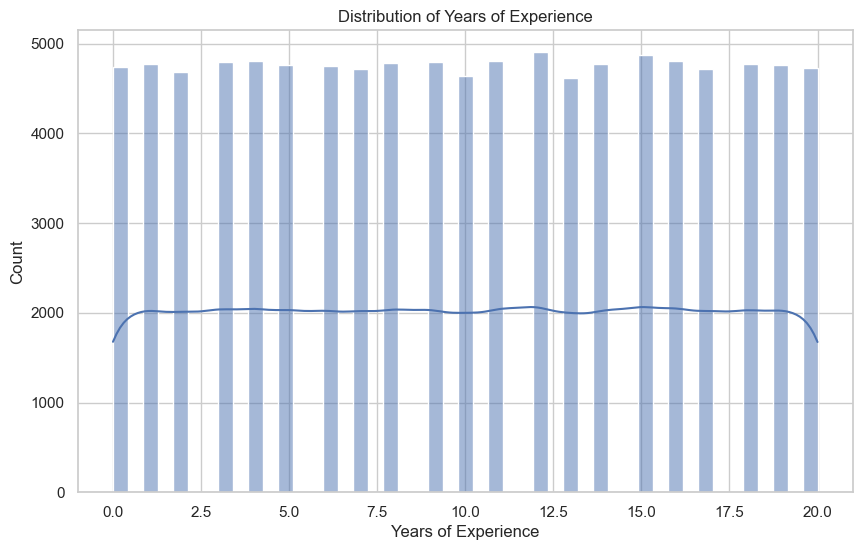

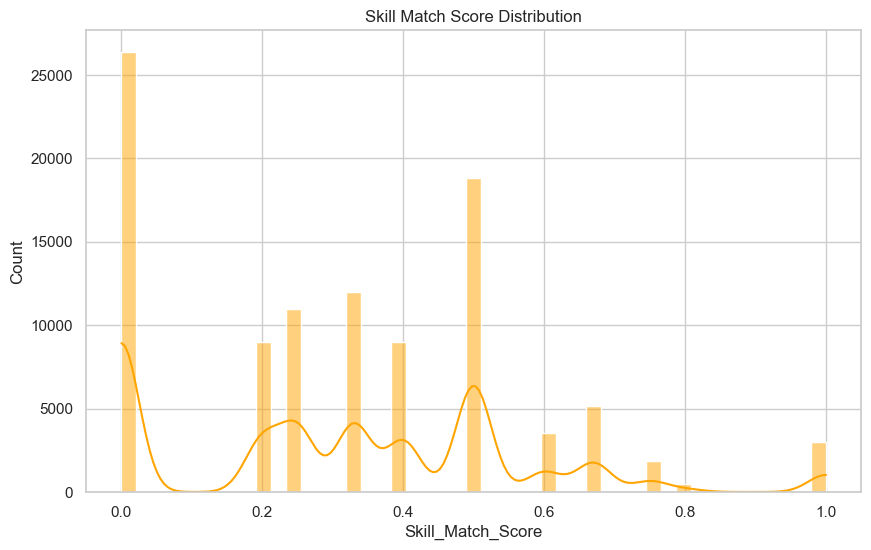

In [69]:
# Example: Distribution of 'Years_Experience'
sns.histplot(df_cleaned['Years_Experience'], kde=True)
plt.title("Distribution of Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Count")
plt.show()

# Example: Skill Match Score
sns.histplot(df_cleaned['Skill_Match_Score'], kde=True, color='orange')
plt.title("Skill Match Score Distribution")
plt.show()


#### Univariate Analysis: Categorical Columns

In [73]:
# List of categorical columns
categorical_cols = df_cleaned.select_dtypes(include='object').columns.tolist()

# Show value counts for a few columns
for col in categorical_cols[:5]:  # First 5 only
    print(f"\nValue counts for {col}:")
    print(df_cleaned[col].value_counts())



Value counts for Candidate_Skills:
Candidate_Skills
['React', 'NLP']                                       271
['NLP', 'AI']                                          255
['SQL', 'NLP']                                         254
['ML', 'DevOps']                                       252
['Java', 'TensorFlow']                                 251
                                                      ... 
['Cloud', 'NLP', 'Data Analytics', 'Java', 'SQL']        1
['AI', 'NLP', 'Data Analytics', 'React', 'Java']         1
['Cloud', 'Java', 'TensorFlow', 'AI', 'DevOps']          1
['ML', 'Data Analytics', 'TensorFlow', 'SQL', 'AI']      1
['Cloud', 'AI', 'SQL', 'Data Analytics', 'Python']       1
Name: count, Length: 28739, dtype: int64

Value counts for Job_Skills_Required:
Job_Skills_Required
['SQL', 'Java']                                            261
['AI', 'Java']                                             258
['AI', 'Cloud']                                            253
['ML', 'A

#### Visualize categorical columns

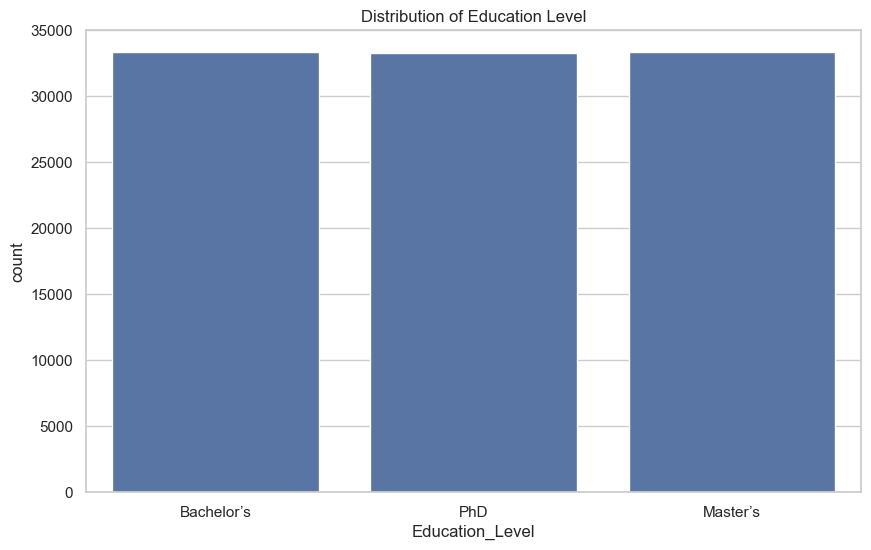

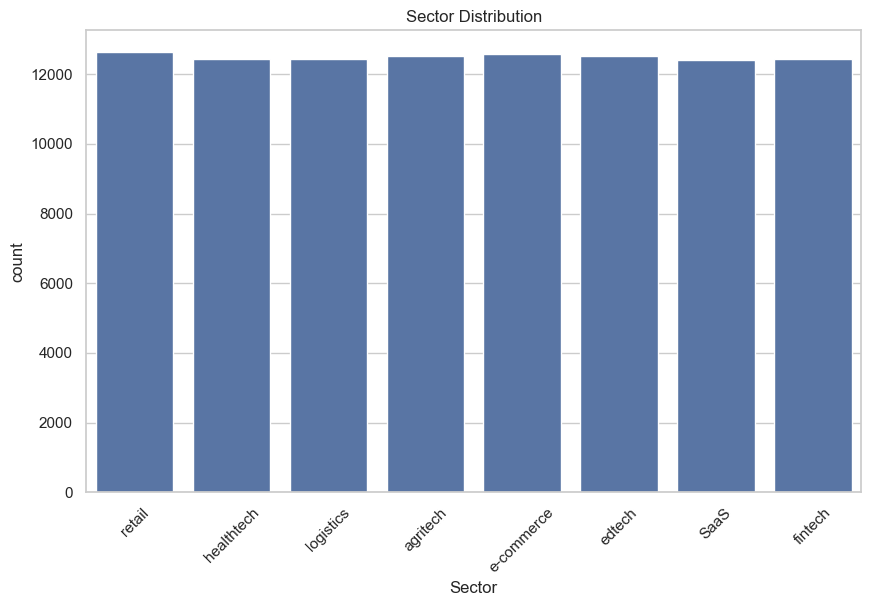

In [76]:
# Example: Education Level
sns.countplot(data=df_cleaned, x='Education_Level')
plt.title("Distribution of Education Level")
plt.show()

# Example: Sector
sns.countplot(data=df_cleaned, x='Sector')
plt.title("Sector Distribution")
plt.xticks(rotation=45)
plt.show()


## B. Bivariate Analysis

#### Categorical vs Categorical – Crosstab

Hire_Success     0.00000  0.13976
Education_Level                  
Bachelor’s         28789     4571
Master’s           28599     4755
PhD                28636     4650


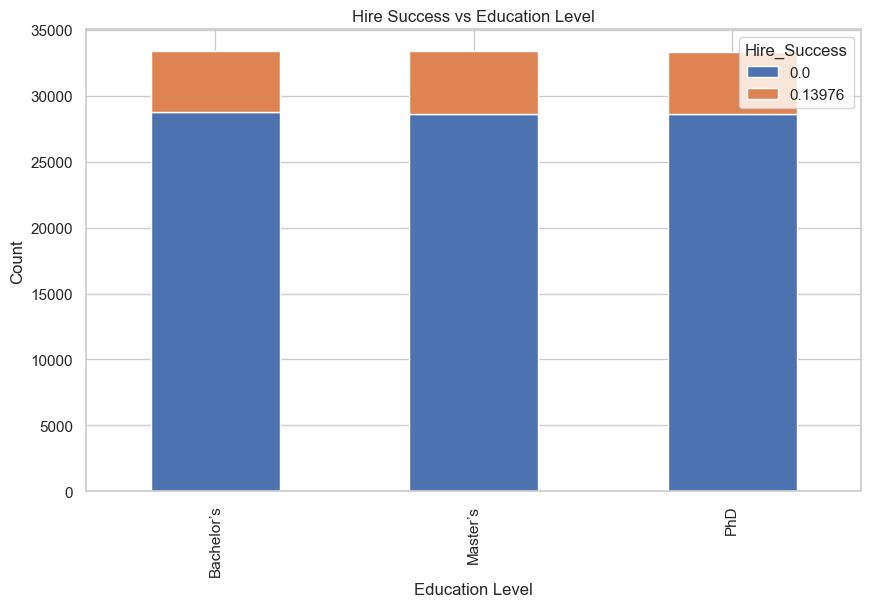

In [81]:
# Example: Hire_Success vs Education_Level
cross_tab = pd.crosstab(df_cleaned['Education_Level'], df_cleaned['Hire_Success'])
print(cross_tab)

# Visualize it
cross_tab.plot(kind='bar', stacked=True)
plt.title("Hire Success vs Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()


####  Categorical vs Numerical – Bar Plot

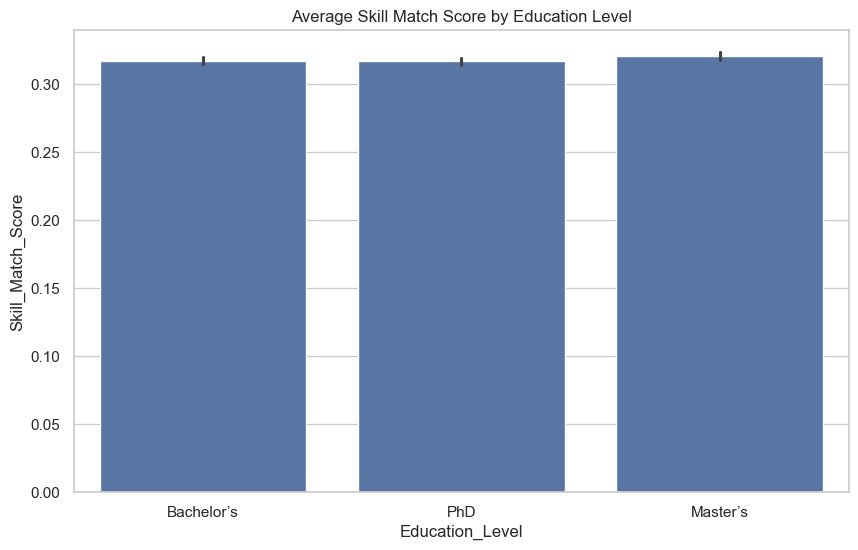

In [84]:
# Example: Average Skill Match Score by Education Level
sns.barplot(x='Education_Level', y='Skill_Match_Score', data=df_cleaned)
plt.title("Average Skill Match Score by Education Level")
plt.show()


#### Numerical vs Numerical – Scatter Plot

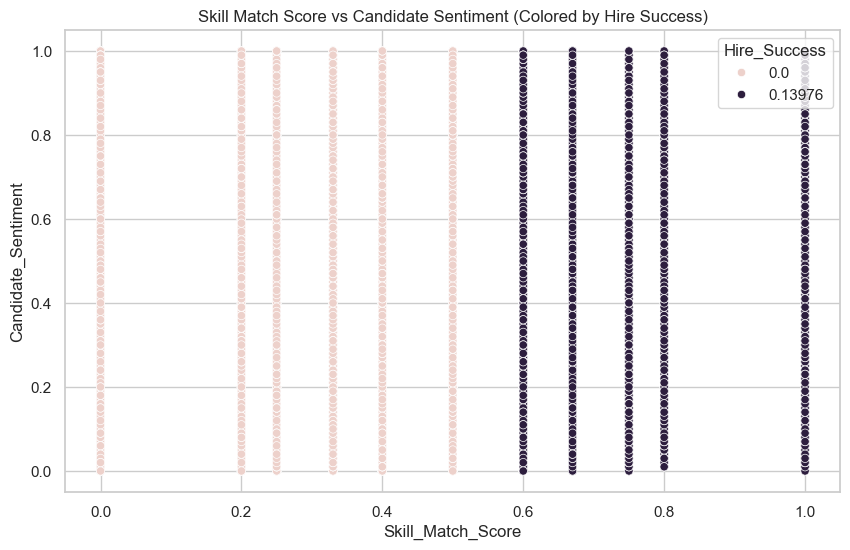

In [87]:
# Example: Skill Match Score vs Candidate Sentiment
sns.scatterplot(x='Skill_Match_Score', y='Candidate_Sentiment', hue='Hire_Success', data=df_cleaned)
plt.title("Skill Match Score vs Candidate Sentiment (Colored by Hire Success)")
plt.show()


## C. Multivariate Analysis

#### Numerical-Numerical-Categorical – Pair Plot with Hue

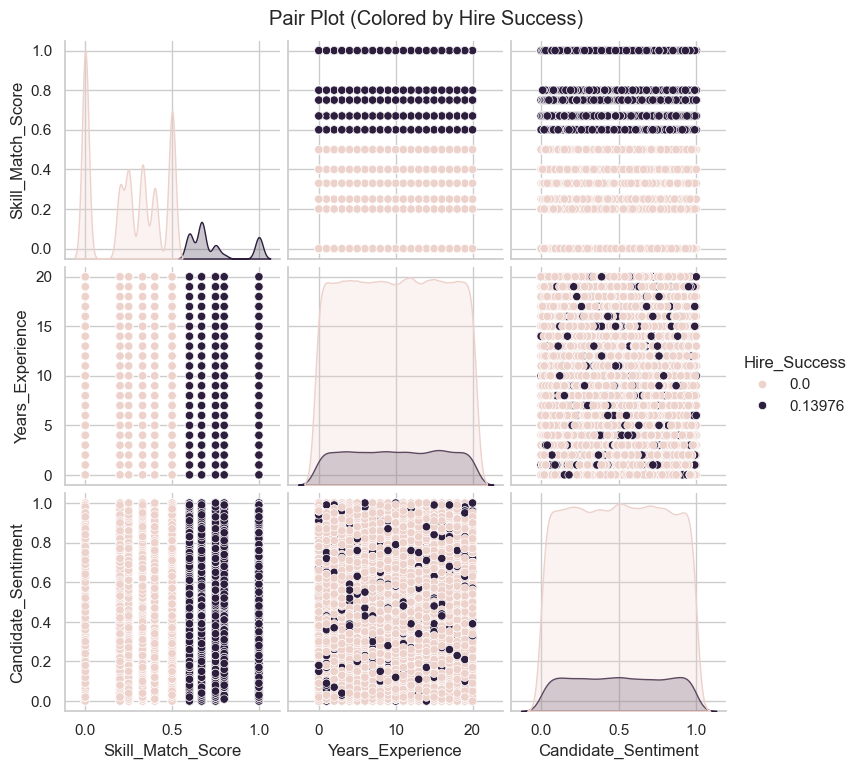

In [92]:
# Select relevant columns
plot_cols = ['Skill_Match_Score', 'Years_Experience', 'Candidate_Sentiment', 'Hire_Success']

# Pair plot
sns.pairplot(df_cleaned[plot_cols], hue='Hire_Success')
plt.suptitle("Pair Plot (Colored by Hire Success)", y=1.02)
plt.show()


#### Categorical-Categorical-Numerical – Pivot Table

In [95]:
# Example: Mean Skill Match Score by Sector and Education Level
pivot = df_cleaned.pivot_table(index='Sector', columns='Education_Level', values='Skill_Match_Score', aggfunc='mean')
print(pivot)


Education_Level  Bachelor’s  Master’s       PhD
Sector                                         
SaaS               0.322907  0.316852  0.317171
agritech           0.309344  0.317318  0.321673
e-commerce         0.318881  0.321309  0.314325
edtech             0.320608  0.317083  0.310705
fintech            0.318207  0.317772  0.321864
healthtech         0.311043  0.324397  0.314365
logistics          0.314029  0.327965  0.321658
retail             0.319571  0.321292  0.310558


# Step 4: Making the Data Ready for Machine Learning

## Separate Features and Target

In [99]:
# Step 4.1: Set the target column
target_col = 'Hire_Success'

# Separate dependent (y) and independent (X) variables
X = df_cleaned.drop(target_col, axis=1)
y = df_cleaned[target_col]


## Encoding Categorical Columns

In [102]:
# Step 4.2: Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("✅ Encoding complete. Encoded shape:", X_encoded.shape)


✅ Encoding complete. Encoded shape: (100000, 57527)


## Scaling Numerical Columns

In [105]:
from sklearn.preprocessing import StandardScaler

# Step 4.3: Identify numeric columns (after encoding)
numerical_cols = X_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create scaler
scaler = StandardScaler()

# Fit and transform
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

print("✅ Scaling complete.")


✅ Scaling complete.


## Train-Test Split

In [109]:
from sklearn.model_selection import train_test_split

# Step 4.4: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y  # Stratify keeps class balance
)

print("✅ Data split complete.")
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


✅ Data split complete.
Training Set Shape: (80000, 57527)
Testing Set Shape: (20000, 57527)


#  Step 5: Find the Base Model

##  FIXED & EFFICIENT CODE FOR ENCODING

In [122]:
from sklearn.preprocessing import LabelEncoder

# Drop 'Candidate_ID' and 'Job_ID' only if they exist in the DataFrame
columns_to_drop = ['Candidate_ID', 'Job_ID']
X = X.drop(columns=[col for col in columns_to_drop if col in X.columns])


# Split into categorical columns
object_cols = X.select_dtypes(include='object').columns

# Let's count how many unique values in each
high_card_cols = [col for col in object_cols if X[col].nunique() > 20]  # Treat >20 as high-card
low_card_cols  = [col for col in object_cols if X[col].nunique() <= 20]

# Step 1: Label encode high-cardinality columns
label_enc = LabelEncoder()
for col in high_card_cols:
    X[col] = label_enc.fit_transform(X[col].astype(str))

# Step 2: One-hot encode low-cardinality columns only
X = pd.get_dummies(X, columns=low_card_cols, drop_first=True)

print("✅ Encoding complete. Final shape:", X.shape)


✅ Encoding complete. Final shape: (100000, 41)


## Standard Scaling (Same as Before)

In [126]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


## Train-Test Split

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [143]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load dataset
df = pd.read_csv("tech_startup_hiring_dataset_extended.csv")  # ✅ Replace with your actual filename if different

# Step 3: Drop irrelevant or ID columns if they exist
for col in ['Candidate_ID', 'Job_ID']:
    if col in df.columns:
        df.drop(columns=col, inplace=True)

# Step 4: Define target column
target_col = 'Hire_Success'  # ✅ Change this if your target column is named differently

# Step 5: Drop rows where target is null
df = df.dropna(subset=[target_col])

# Step 6: Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Step 7: Encode all categorical columns using LabelEncoder (to avoid memory errors)
object_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()
for col in object_cols:
    X[col] = le.fit_transform(X[col].astype(str))

# Step 8: Encode target if it's categorical
if y.dtype == 'object':
    y = le.fit_transform(y.astype(str))

# Step 9: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Define and train base models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC()
}

# Step 11: Train and evaluate each model
for name, model in models.items():
    print(f"\n🔍 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"✅ {name} F1 Score: {f1:.4f}")
    print("📊 Classification Report:\n", classification_report(y_test, y_pred))



🔍 Training Logistic Regression...
✅ Logistic Regression F1 Score: 0.8008
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93     17278
           1       0.00      0.00      0.00      2722

    accuracy                           0.86     20000
   macro avg       0.43      0.50      0.46     20000
weighted avg       0.75      0.86      0.80     20000


🔍 Training Random Forest...
✅ Random Forest F1 Score: 1.0000
📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17278
           1       1.00      1.00      1.00      2722

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000


🔍 Training Decision Tree...
✅ Decision Tree F1 Score: 1.0000
📊 Classification Report:
               precision    recall  f1-score   support

           0   

# STEP 6: Hyperparameter Tuning Using Cross Validation

In [147]:
# ✅ Import necessary libraries
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# ✅ Step 1: Define the model (your best/base model found earlier)
model = RandomForestClassifier(random_state=42)

# ✅ Step 2: Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],  # Try just 2-3 values
    'max_depth': [None, 10],    # Keep options small
}

# ✅ Step 3: Define cross-validation strategy
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

# ✅ Step 4: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='f1_weighted',   # You can also use 'accuracy' or others
    verbose=1,
    n_jobs=-1                # Use all CPU cores for faster processing
)

# ✅ Step 5: Fit GridSearch to training data
grid_search.fit(X_train, y_train)

# ✅ Step 6: View best parameters and best score
print("\n✅ Best Parameters Found:")
print(grid_search.best_params_)

print("\n✅ Best Cross-Validated F1 Score:")
print(grid_search.best_score_)

# ✅ Step 7: Use the best estimator to predict and evaluate
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\n📊 Final Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits

✅ Best Parameters Found:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

✅ Best Cross-Validated F1 Score:
1.0

📊 Final Evaluation on Test Set:
Accuracy: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17278
           1       1.00      1.00      1.00      2722

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# ✅ Step 1: Define your model
model = RandomForestClassifier(random_state=42)

# ✅ Step 2: Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# ✅ Step 3: Apply RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=10,                # Number of combinations to try
    scoring='f1_weighted',    # Use F1 score as evaluation
    cv=5,                     # 5-fold cross validation
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# ✅ Step 4: Fit to training data
random_search.fit(X_train, y_train)

# ✅ Step 5: Print best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# ✅ Step 6: Use best estimator to predict and evaluate
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}
Best Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17278
           1       1.00      1.00      1.00      2722

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



# Step-7: Perform Feature Selection using RFE

✅ Selected Top Features using RFE:
Index(['Candidate_Skills', 'Job_Skills_Required', 'Skill_Match_Score',
       'Funding_Amount', 'Headcount', 'Turnover_Risk', 'Skill_Gap',
       'Expected_Salary', 'Offered_Salary', 'Offer_Accepted'],
      dtype='object')


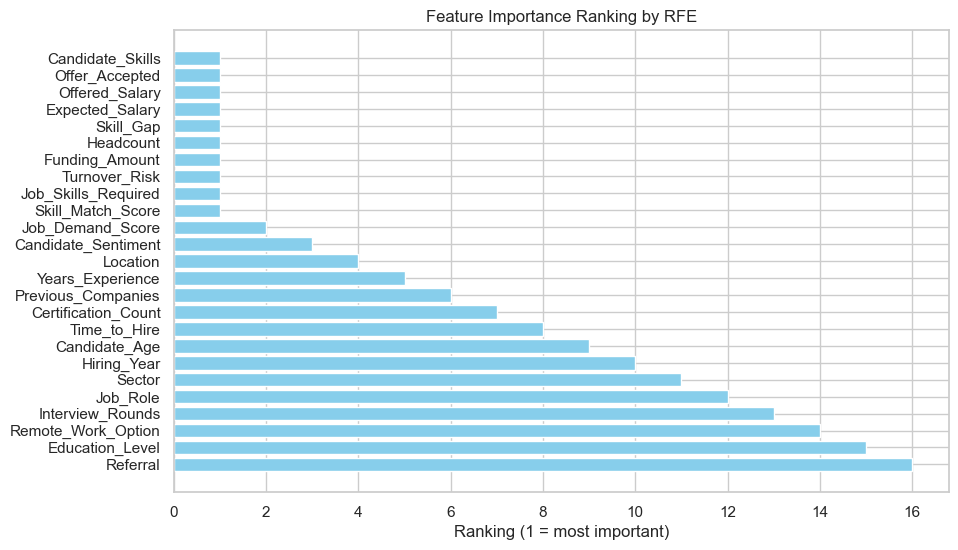

In [152]:
# ✅ Step 7: Feature Selection using RFE (Recursive Feature Elimination)

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier  # You can change this to any estimator
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Use your best estimator from tuning (replace if needed)
best_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42
)

# ✅ RFE Initialization
rfe_selector = RFE(estimator=best_model, n_features_to_select=10)  # 🔁 You can change the number

# ✅ Fit RFE
rfe_selector = rfe_selector.fit(X_train, y_train)

# ✅ Get selected features
selected_features = X_train.columns[rfe_selector.support_]

print("✅ Selected Top Features using RFE:")
print(selected_features)

# ✅ Optional: Visualize feature ranking
ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': rfe_selector.ranking_
}).sort_values(by='Ranking')

plt.figure(figsize=(10, 6))
plt.barh(ranking['Feature'], ranking['Ranking'], color='skyblue')
plt.xlabel('Ranking (1 = most important)')
plt.title('Feature Importance Ranking by RFE')
plt.gca().invert_yaxis()
plt.show()


In [154]:
# Reduce your dataset
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Retrain with selected features
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

# Evaluate again
from sklearn.metrics import classification_report, accuracy_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17278
           1       1.00      1.00      1.00      2722

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

